In [364]:
import pandas as pd
import numpy as np
import pickle
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

In [365]:
data = pd.read_csv("HollywoodsMostProfitableStories.csv", na_values=[" ", "?","-", "_"])

In [366]:
#droping missing values
data = data.dropna()

In [367]:
# Filtering out data we not going to use
data = data[["Audience_Score %", "Profitability", "Rotten Tomatoes %", "Worldwide Gross"]]

#### Given the limited size of our dataset, we've chosen to employ Scikit-Learn's simpler models over neural networks. Small datasets can be challenging for deep learning models, which excel when trained on large data. By opting for straightforward and interpretable models like linear regression, we mitigate the risk of overfitting and improve the clarity of our results.

#### Building the model to predict the `"Rotten Tomatoes %"` Using the `"Audience_score %"` 

In [368]:
x = np.array(data['Audience_Score %'])
x = x.reshape(-1,1) # done because scikit learn cannot use rank 1 matrix
y = np.array(data['Rotten Tomatoes %'])

In [369]:
# variable to store our best score of our model
best_score = 0 

### Trainning the model

In [370]:
for _ in range(100):
    # spliting data into the train and testing sets
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
    #creating the Model
    linear = linear_model.LinearRegression()
    #fitting trainning data
    linear.fit(x_train, y_train)
    # Testing our model accuracy
    acc = linear.score(x_test, y_test)

    if acc > best_score:
        best_score = acc
        # using pickle to store our best model
        with open("tomatoesmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

print("best_score:", best_score) 
print("coefficient:", linear.coef_)
print("Intercept:", linear.intercept_)

best_score: 0.6973773779135392
coefficient: [1.072]
Intercept: -21.507097206669876


In [371]:
prediction = linear.predict(x_test)
y_predict = linear.predict(x)

In [372]:
for i in range(len(prediction)):
    print(f"predicted_value:{prediction[i]}\t Audience_score:{x_test[i]}\t Rotten Tomato %:{y_test[i]}")

predicted_value:62.119274511148184	 Audience_score:[78.]	 Rotten Tomato %:27.0
predicted_value:55.68647668670065	 Audience_score:[72.]	 Rotten Tomato %:60.0
predicted_value:73.91273718930202	 Audience_score:[89.]	 Rotten Tomato %:96.0
predicted_value:21.378221622980412	 Audience_score:[40.]	 Rotten Tomato %:18.0
predicted_value:68.55207233559574	 Audience_score:[84.]	 Rotten Tomato %:83.0
predicted_value:33.17168430113424	 Audience_score:[51.]	 Rotten Tomato %:40.0
predicted_value:46.03727995002934	 Audience_score:[63.]	 Rotten Tomato %:56.0


#### Plotting Values and Regression Line

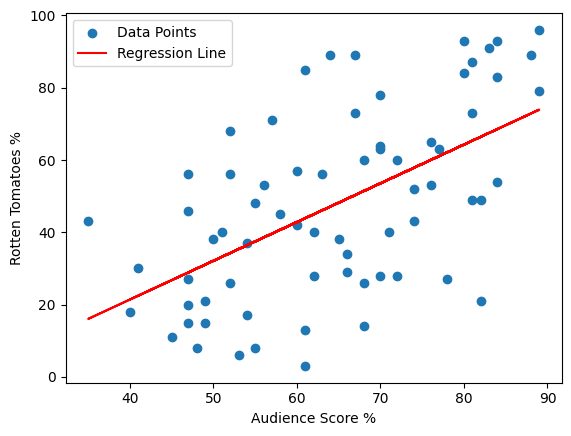

In [373]:
plt.scatter(x, y, label="Data Points")
plt.plot(x, y_predict, color='red', label="Regression Line")
plt.xlabel("Audience Score %")
plt.ylabel("Rotten Tomatoes %")
plt.legend()
plt.show()

#### Building the model to predict the `"Worldwide Gross"` Using the `"Audience_score %", "Profitability" and "Rotten Tomatoes"`

In [374]:
x1 = np.array(data.drop('Worldwide Gross', axis = 1))
y1 = np.array(data['Worldwide Gross'])

In [375]:
best_score1 = 0 

### Trainning the model

In [376]:
for _ in range(100):
    # spliting data into the train and testing sets
    x1_train, x1_test, y1_train, y1_test = sklearn.model_selection.train_test_split(x1, y1, test_size = 0.1)
    #creating the Model
    linear_gross = linear_model.LinearRegression()
    #fitting trainning data
    linear_gross.fit(x1_train, y1_train)
    # Testing our model accuracy
    acc = linear_gross.score(x1_test, y1_test)

    if acc > best_score1:
        best_score1 = acc
        # using pickle to store our best model
        with open("worldGrossmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

print("best_score:", best_score1) 
print("coefficients:", linear_gross.coef_)
print("Intercept:", linear_gross.intercept_)

best_score: 0.681301179420716
coefficients: [ 4.232 18.775 -1.158]
Intercept: -150.16664910088207


In [377]:
predictions = linear_gross.predict(x1_test)

In [378]:
for i in range(len(predictions)):
    print(f"predicted_value:{predictions[i]}\t Our_Values:{x1_test[i]}\t Worldwide Gross:{y1_test[i]}")

predicted_value:55.83828744142494	 Our_Values:[47.     2.044 27.   ]	 Worldwide Gross:102.22
predicted_value:1276.0075301757156	 Our_Values:[51.    66.934 40.   ]	 Worldwide Gross:33.467
predicted_value:179.17544702782396	 Our_Values:[70.     3.491 28.   ]	 Worldwide Gross:55.86
predicted_value:50.903877683571494	 Our_Values:[45.     1.245 11.   ]	 Worldwide Gross:93.4
predicted_value:35.889705947217834	 Our_Values:[40.     2.004 18.   ]	 Worldwide Gross:36.08
predicted_value:227.32763387243898	 Our_Values:[68.     6.383 26.   ]	 Worldwide Gross:702.17
predicted_value:238.48977690942644	 Our_Values:[67.   11.09 89.  ]	 Worldwide Gross:22.179483


### Conclution
The suboptimal performance of our models during the validation checks can be attributed to several key factors. Our relatively small dataset poses a challenge, as machine learning models often thrive on larger data volumes to generalize effectively. Moreover, the presence of numerous outliers can introduce noise and disrupt the models' ability to make accurate predictions. Additionally, the weak correlation between our input features and the target variable further complicates the modeling process. The selection of overly complex models may also contribute to overfitting, especially given our limited data.
